In [21]:
import numpy as np
import numpy.testing as npt
from scipy.linalg import expm
import matplotlib.pyplot as plt
import scipy.spatial, scipy.linalg
import scipy.sparse.linalg
from scipy.cluster.hierarchy import linkage, dendrogram
import itertools
%matplotlib inline

#mu, r, loss = kmeans(X, k, max iter=100)

#which, with respect to the rows of the n×d Matrix X, calculates the k ×d Matrix for the k Cluster
#centroids mu as well as the n-dimensional vector r of cluster membership: the i-th entry of r should
#contain the index of the Clusters to which the i-th datapoint belongs. It also returns the loss
#(k-means criterion).
X = np.array([[0., 1., 1., 10., 10.25, 11., 10., 10.25, 11.],
              [0., 0., 1.,  0.,   0.5,  0.,  5.,   5.5,  5.]]).T
perfect_r = [1,0,1,2,2,1,2,2,2]
maxiter=100
k=3

In [22]:

def kmeans(X,k,maxiter=100):
    n=len(X)
    d=len(X[0])
    mu = (np.var(X,axis=0)**(1/2))*np.random.randn(k,d)+ np.mean(X,axis=0)
    ite =0
    X2 = (X**2).sum(1).reshape(n,1)*np.ones((n,k))
    U2 = (mu**2).sum(1).reshape(1,k) * np.ones([n,k])
    D = X2 - 2*(X.dot(mu.T)) + U2
    muidx = np.ones(D.shape)*np.arange(k)
    r = np.argmin(D,axis=1)
    r = r.reshape(len(r),1)
    member = (muidx==r).sum(0)
    members = np.array(member).reshape(1,k)

    while(ite<maxiter):
        idx=((np.ones((n,k))*np.arange(k))==r).astype(np.int64)
        division = (member).reshape(k,1)
        zero = np.where(division==0)[0]
        division[zero]=1
        mu = ((idx.T.reshape(k,n,1)*X).sum(1))/division 
        mu[zero] = (np.var(X,axis=0)**(1/2))*np.random.randn(len(zero),d)+ np.mean(X,axis=0)
        X2 = (X**2).sum(1).reshape(n,1)*np.ones((n,k))
        U2 = (mu**2).sum(1).reshape(1,k) * np.ones([n,k])
        D = X2 - 2*(X.dot(mu.T)) + U2
        rr = np.argmin(D,axis=1).reshape(len(r),1)
        boolvec=(r == rr)
        if (len(boolvec)==sum(boolvec)):
            break
        r = rr  
        member = ((np.ones(D.shape)*np.arange(k))==r).sum(0)
        members = np.append(members,member.reshape(1,k),axis=0)

        ite = ite +1        
    loss = np.sum(np.sort(D,axis=1)[:,0])
    print("The number of iterations performed: ",ite)
    print("The number of cluster memberships: ")
    print("k= ",np.arange(1,k+1))
    print(members)
    print(" The loss function value: ",loss)
    return mu,r.T[0],loss


In [23]:
X = np.array([[0., 1., 1., 10., 10.25, 11., 10., 10.25, 11.],
              [0., 0., 1.,  0.,   0.5,  0.,  5.,   5.5,  5.]]).T
perfect_r = [1,0,1,2,2,1,2,2,2]
def test_kmeans(X):
    worked1 = False
    worked2 = False

    for _ in range(10):
        mu, r, _ = kmeans(X, k=3)
        if (r[0]==r[1]==r[2]!=r[3] and r[3]==r[4]==r[5]!=r[6] and r[6]==r[7]==r[8]):
            worked1 = True

        # test one cluster center
        if (np.linalg.norm(mu[0] - [10.41666, 0.1666]) < 0.1 or
                np.linalg.norm(mu[1] - [10.41666, 0.1666]) < 0.1 or
                np.linalg.norm(mu[2] - [10.41666, 0.1666]) < 0.1):
            worked2 = True
        if worked1 and worked2:
            break
    if not worked1:
        raise AssertionError('test_kmeans cluster assignments are wrong.')
    if not worked2:
        raise AssertionError('test_kmeans did not find the correct cluster center.')
    print(r)
    print("ok")

In [24]:
test_kmeans(X)
mu, r, loss = kmeans(X,k,maxiter=100)
mu, r, loss = imp.kmeans(X, 7)

The number of iterations performed:  0
The number of cluster memberships: 
k=  [1 2 3]
[[3 3 3]]
 The loss function value:  2.75
[1 1 1 0 0 0 2 2 2]
ok
The number of iterations performed:  1
The number of cluster memberships: 
k=  [1 2 3]
[[3 0 6]
 [3 3 3]]
 The loss function value:  2.75


NameError: name 'imp' is not defined

In [25]:
r


array([0, 0, 0, 2, 2, 2, 1, 1, 1])

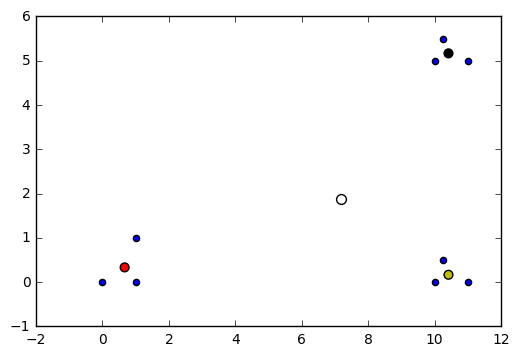

In [26]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(mu[:,0],mu[:,1],40,['r','k','y'])
mX=np.mean(X,axis=0)
plt.scatter(mX[0],mX[1], 50, 'w')

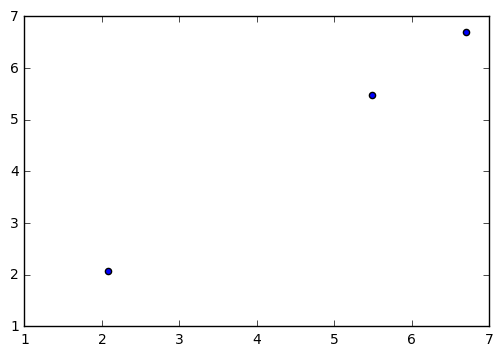

In [27]:
tmu = 5*np.random.randn(3,2)+ np.mean(X,axis=0)# +np.random.exponential(scale=0.2, size=(3,2))
plt.scatter(tmu[:,0],tmu[:,0])

## Assignment 2 (10 point)

In [28]:
import numpy as np
import numpy.testing as npt
from scipy.linalg import expm
import matplotlib.pyplot as plt
import scipy.spatial, scipy.linalg
import scipy.sparse.linalg
from scipy.cluster.hierarchy import linkage, dendrogram
import itertools
import sheet2 as imp
%matplotlib inline

XX = np.array([[0., 1., 1., 10., 10.25, 11., 10., 10.25, 11.],
              [0., 0., 1.,  0.,   0.5,  0.,  5.,   5.5,  5.]]).T
perfect_r =[1, 1, 1, 2, 2, 2, 0, 0, 0] # [1,0,1,2,2,1,2,2,2]
# R, kmloss, mergeidx = kmeans agglo(X, r)
rr = np.array(perfect_r)
gaus5 =np.load('5_gaussians.npy')
X = gaus5.T
mu, r, loss = imp.kmeans(X, 7)

The number of iterations performed:  8
The number of cluster memberships: 
k=  [1 2 3 4 5 6 7]
[[145   0   0  68 189  31  67]
 [ 88  19  14  93 190  34  62]
 [ 84  29  34  87 170  37  59]
 [ 85  40  77  75 125  39  59]
 [ 90  44 100  66 100  39  61]
 [ 94  48 100  58 100  39  61]
 [ 95  49 100  56 100  39  61]
 [ 95  53 100  52 100  39  61]
 [ 95  55 100  50 100  39  61]]
 The loss function value:  48.9299594993


In [29]:
scipy.cluster.hierarchy.linkage(XX)

array([[  3.        ,   4.        ,   0.55901699,   2.        ],
       [  6.        ,   7.        ,   0.55901699,   2.        ],
       [  5.        ,   9.        ,   0.90138782,   3.        ],
       [  8.        ,  10.        ,   0.90138782,   3.        ],
       [  0.        ,   2.        ,   1.        ,   2.        ],
       [  1.        ,  13.        ,   1.        ,   3.        ],
       [ 11.        ,  12.        ,   4.50693909,   6.        ],
       [ 14.        ,  15.        ,   9.        ,   9.        ]])

In [30]:
def kmeans_agglo(X, r):
    n = len(X)
    d = len(X[0])
    mxidx=np.max(r)
    K=len(set(r))
    if(K<2):
        raise AssertionError('Number of cluster shuld be more than 1')
    kmloss = np.zeros(K)
    R = np.zeros((K-1,n)).astype(np.int64)
    R[0] = np.array(r)
    RR = np.zeros((K-1,n)).astype(np.int64)
    RR[0] = np.array(r)
    ite = 1
    checkbox = (np.arange(0,K)*np.ones((n,1))).T
    bb =(R[0]==checkbox).astype(np.float64)
    mmm=np.sum(bb,axis=1).reshape(K,1)
    BB = bb[:,:,np.newaxis]
    C = bb[:,:,np.newaxis]*X
    C = np.sum(C,axis=1)
    C = C/mmm
    clabel = np.arange(K)
    kmloss[0]=np.linalg.norm(BB*C[:,np.newaxis,:]-bb[:,:,np.newaxis]*X,axis=2).sum()
    mergeidx=np.zeros((K-1,2)).astype(np.int64)
    while(K>2):
        seq = np.arange(0,K)
        label=np.array(list(itertools.combinations(seq,2)))
        combo=(C[label[:,0]]+C[label[:,1]])/2
        cmblabel = np.array((clabel[label[:,0]],clabel[label[:,1]])).T
        f = len(cmblabel)#number of combo
        newlab=cmblabel.reshape(len(cmblabel),2,1)
        newlab=np.ones((2,n))*newlab
        inridx = (newlab==R[ite-1]).astype(np.int64)
        inridx = inridx[:,0,:]+inridx[:,1,:]
        inX = inridx[:,:,np.newaxis]*X
        resizC = inridx[:,:,np.newaxis]*combo[:,np.newaxis,:]
        inD = np.linalg.norm(inX-resizC,axis=2).sum(1)
        outidx = np.ones(inridx.shape).astype(np.int64) -inridx
        outX = outidx[:,:,np.newaxis]*X
        g= lambda x: np.where(clabel==x)
        adress = np.array(list(map(g,R[ite-1])))
        outC=outidx[:,:,np.newaxis]*C[adress].reshape(n,2)
        outD = np.linalg.norm(outX-outC,axis=2).sum(1)
        D = inD + outD
        minidx=np.argmin(D)
        bestCom = combo[minidx]
        bClabel= cmblabel[minidx]
        kmloss[ite] = D[minidx]
        rr=np.array(R[ite-1])
        rr[np.where(rr==max(bClabel))]=ite+mxidx
        rr[np.where(rr==min(bClabel))]=ite+mxidx
        R[ite]=rr
        C[ np.where(min(bClabel))]=bestCom
        C = np.delete(C, np.where(clabel==max(bClabel)), 0)
        clabel[np.where(clabel==min(bClabel))]=ite+mxidx
        clabel = np.delete(clabel, np.where(clabel==max(bClabel)), 0)
        mergeidx[ite-1][1] =  max(bClabel)
        mergeidx[ite-1][0] =  min(bClabel)  
        ite = ite +1
        K=K-1
    lstmerge=(C[0]+C[1])/2
    kmloss[len(kmloss)-1]=np.linalg.norm(X-lstmerge,axis=1).sum()
    lstlbl=set(R[len(R)-1])
    mergeidx[len(mergeidx)-1][1]=max(lstlbl)
    mergeidx[len(mergeidx)-1][0]=min(lstlbl)
    return R, kmloss, mergeidx

In [31]:
R, kmloss, mergeidx = kmeans_agglo(X, r)
print(R)
print(mergeidx)

[[ 4  4  4 ...,  6  6  5]
 [ 4  4  4 ...,  7  7  7]
 [ 4  4  4 ...,  7  7  7]
 [ 4  4  4 ...,  7  7  7]
 [10 10 10 ...,  7  7  7]
 [11 11 11 ...,  7  7  7]]
[[ 5  6]
 [ 0  3]
 [ 1  8]
 [ 2  4]
 [ 9 10]
 [ 7 11]]


In [32]:
def agglo_dendro(kmloss, mergeidx):
    k = len(mergeidx)
    num=np.ones(k*2+1)
    for i in range(k):
        num[i+k+1]=num[mergeidx[i][0]] +num[mergeidx[i][1]]
    for i in range(k+1):
        num = np.delete(num,0)
    num= num.reshape(k,1)
    kmloss2 = np.delete(kmloss,0).reshape(len(kmloss)-1,1)
    ergb=np.append(np.append(mergeidx,kmloss2,1),num,1)
    scipy.cluster.hierarchy.dendrogram(ergb)
    plt.show()

[ 131.75825728  141.8496906   335.77206172  400.04435308  298.82727833
  676.27984005  882.98373886]


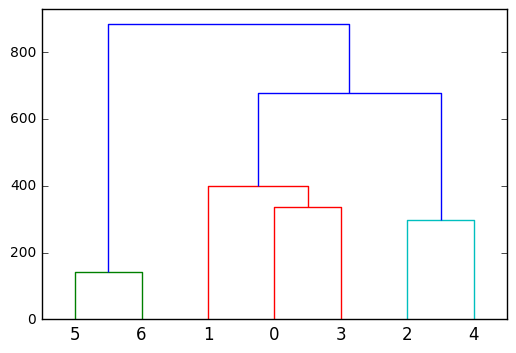

In [33]:
R, kmloss, mergeidx = kmeans_agglo(X, r)
print(kmloss)
agglo_dendro(kmloss, mergeidx)

In [34]:
def test_agglo(X):
    worked = False
    for _ in range(10):
        mu, r, _ = kmeans(X, k=3)
        r = r.flatten()
        R, kmloss, mergeidx = kmeans_agglo(X, r)
        mergeidx = np.array(mergeidx, dtype=int)
        if set([int(r[3]), int(r[6])]) == set(mergeidx[0, :]):
            worked = True
            agglo_dendro(kmloss, mergeidx)
            break
    if not worked:
        raise AssertionError('test_agglo: the first merge is not correct.')
    print("test_aggro_ok")

In [35]:
test_agglo(X)

The number of iterations performed:  3
The number of cluster memberships: 
k=  [1 2 3]
[[202  64 234]
 [201 174 125]
 [200 199 101]
 [200 200 100]]
 The loss function value:  161.425259008
The number of iterations performed:  4
The number of cluster memberships: 
k=  [1 2 3]
[[173 226 101]
 [184 202 114]
 [132 200 168]
 [102 200 198]
 [100 200 200]]
 The loss function value:  161.425259008
The number of iterations performed:  2
The number of cluster memberships: 
k=  [1 2 3]
[[261 200  39]
 [140 200 160]
 [100 200 200]]
 The loss function value:  161.425259008
The number of iterations performed:  8
The number of cluster memberships: 
k=  [1 2 3]
[[427  66   7]
 [302 188  10]
 [298 178  24]
 [298 157  45]
 [292 139  69]
 [277 121 102]
 [241 122 137]
 [200 175 125]
 [200 200 100]]
 The loss function value:  161.425259008
The number of iterations performed:  8
The number of cluster memberships: 
k=  [1 2 3]
[[ 91 300 109]
 [100 298 102]
 [100 289 111]
 [100 274 126]
 [100 248 152]
 [103 2

AssertionError: test_agglo: the first merge is not correct.

## Assignment 4 (5 points

In [36]:
import numpy as np
import numpy.testing as npt
from scipy.linalg import expm
import matplotlib.pyplot as plt
import scipy.spatial, scipy.linalg
import scipy.sparse.linalg
import math
from scipy.cluster.hierarchy import linkage, dendrogram
import itertools
from functools import reduce
%matplotlib inline
X = np.array([[0., 1., 1., 10., 10.25, 11., 10., 10.25, 11.],
              [0., 0., 1.,  0.,   0.5,  0.,  5.,   5.5,  5.]]).T
k = 3

In [37]:
def norm_pdf(X, mu, C):
    C_inv= np.linalg.solve(C,np.ones((k,1,1))*np.eye(d))
    c1 = C_inv[:,:,0][:,np.newaxis,:]*np.ones((k,n,d))
    c2 = C_inv[:,:,1][:,np.newaxis,:]*np.ones((k,n,d))
    n=len(X)
    d=len(X[0])
    k =mu.shape[0]
    XX=np.ones((k,1,1))*X
    bmu = mu[:,np.newaxis,:]*np.ones((k,n,d))
    XX=XX-bmu
    X1=(XX*c1).sum(2)
    X2=(XX*c2).sum(2)
    X3=np.append(X1[:,:,np.newaxis],X2[:,:,np.newaxis],2)
    y =np.exp(-((XX*X3).sum(2))/2)/((np.sqrt((2*np.pi)**d)*np.sqrt(np.linalg.det(C))).reshape(k,1))
    return y

In [38]:
def norm_pdf_npinv(X, mu, C):
    C_inv= np.linalg.solve(C)
    c1 = C_inv[:,:,0][:,np.newaxis,:]*np.ones((k,n,d))
    c2 = C_inv[:,:,1][:,np.newaxis,:]*np.ones((k,n,d))
    n=len(X)
    d=len(X[0])
    k =mu.shape[0]
    XX=np.ones((k,1,1))*X
    bmu = mu[:,np.newaxis,:]*np.ones((k,n,d))
    XX=XX-bmu
    X1=(XX*c1).sum(2)
    X2=(XX*c2).sum(2)
    X3=np.append(X1[:,:,np.newaxis],X2[:,:,np.newaxis],2)
    y =np.exp(-((XX*X3).sum(2))/2)/((np.sqrt((2*np.pi)**d)*np.sqrt(np.linalg.det(C))).reshape(k,1))
    return y

In [39]:
import time
n = len(X)
d = len(X[0])

num = np.random.choice(len(X),k,replace=False)
mu = X[num]
C = np.random.rand(k,d,d)

t1 = time.time()
np.linalg.inv(C)
t2 = time.time()

t3 = time.time()
np.linalg.solve(C,np.ones((k,1,1))*np.eye(d))
t4 = time.time()

print ("A^(-1) (numpy.linalg.inv()): %f sec." % (t2 - t1))
print ("A^)(-1) (numpy.linalg.solve()): %f sec." % (t4 - t3))

A^(-1) (numpy.linalg.inv()): 0.008431 sec.
A^)(-1) (numpy.linalg.solve()): 0.001167 sec.


In [40]:
print(np.cov(X))

[[  0.        0.        0.        0.        0.        0.        0.        0.
    0.     ]
 [  0.        0.5       0.        5.        4.875     5.5       2.5       2.375
    3.     ]
 [  0.        0.        0.        0.        0.        0.        0.        0.
    0.     ]
 [  0.        5.        0.       50.       48.75     55.       25.       23.75
   30.     ]
 [  0.        4.875     0.       48.75     47.53125  53.625    24.375
   23.15625  29.25   ]
 [  0.        5.5       0.       55.       53.625    60.5      27.5      26.125
   33.     ]
 [  0.        2.5       0.       25.       24.375    27.5      12.5      11.875
   15.     ]
 [  0.        2.375     0.       23.75     23.15625  26.125    11.875
   11.28125  14.25   ]
 [  0.        3.        0.       30.       29.25     33.       15.       14.25
   18.     ]]


In [41]:
seq=np.arange(k*n)
seqmu=np.sort(seq%k)
seqX = seq%n
print(seqX)
g=lambda x,y:x-y
print(X)
print(g(X[seqX],mu[seqmu]).reshape(k,n,2))

[0 1 2 3 4 5 6 7 8 0 1 2 3 4 5 6 7 8 0 1 2 3 4 5 6 7 8]
[[  0.     0.  ]
 [  1.     0.  ]
 [  1.     1.  ]
 [ 10.     0.  ]
 [ 10.25   0.5 ]
 [ 11.     0.  ]
 [ 10.     5.  ]
 [ 10.25   5.5 ]
 [ 11.     5.  ]]
[[[  0.     0.  ]
  [  1.     0.  ]
  [  1.     1.  ]
  [ 10.     0.  ]
  [ 10.25   0.5 ]
  [ 11.     0.  ]
  [ 10.     5.  ]
  [ 10.25   5.5 ]
  [ 11.     5.  ]]

 [[ -1.    -1.  ]
  [  0.    -1.  ]
  [  0.     0.  ]
  [  9.    -1.  ]
  [  9.25  -0.5 ]
  [ 10.    -1.  ]
  [  9.     4.  ]
  [  9.25   4.5 ]
  [ 10.     4.  ]]

 [[-11.    -5.  ]
  [-10.    -5.  ]
  [-10.    -4.  ]
  [ -1.    -5.  ]
  [ -0.75  -4.5 ]
  [  0.    -5.  ]
  [ -1.     0.  ]
  [ -0.75   0.5 ]
  [  0.     0.  ]]]


In [42]:
XX = reduce(lambda x,y:x+y, X,mu)
print(XX)
C = np.cov(X.T)
C_inv = np.linalg.solve(C, np.eye(len(C)))
C_inv

[[ 64.5  17. ]
 [ 65.5  18. ]
 [ 75.5  22. ]]


array([[ 0.05345806, -0.04942916],
       [-0.04942916,  0.20768366]])

## Assignment 5 (15 points)

In [43]:
import numpy as np
import numpy.testing as npt
from scipy.linalg import expm
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from matplotlib.collections import PatchCollection
import scipy.spatial, scipy.linalg
import scipy.sparse.linalg
from scipy.misc import logsumexp
from scipy.cluster.hierarchy import linkage, dendrogram
import itertools
%matplotlib inline
X = np.array([[0., 1., 1., 10., 10.25, 11., 10., 10.25, 11.],
              [0., 0., 1.,  0.,   0.5,  0.,  5.,   5.5,  5.]]).T
perfect_r = [1,0,1,2,2,1,2,2,2]
k = 3
#pi, mu, sigma, loglik = em_gmm(X, k, max_iter=100, init_kmeans=False, tol=1e-5)


In [44]:
def norm_pdf(X, mu, C):
    n=len(X)
    d=len(X[0])
    k =mu.shape[0]
    C_inv= np.linalg.solve(C,np.ones((k,1,1))*np.eye(d))
    c1 = C_inv[:,:,0][:,np.newaxis,:]*np.ones((k,n,d))
    c2 = C_inv[:,:,1][:,np.newaxis,:]*np.ones((k,n,d))
    XX=np.ones((k,1,1))*X
    bmu = mu[:,np.newaxis,:]*np.ones((k,n,d))
    XX=XX-bmu
    X1=(XX*c1).sum(2)
    X2=(XX*c2).sum(2)
    X3=np.append(X1[:,:,np.newaxis],X2[:,:,np.newaxis],2)
    y =np.exp(-((XX*X3).sum(2))/2)/((np.sqrt((2*np.pi)**d)*np.sqrt(np.linalg.det(C))).reshape(k,1))
    return y

In [64]:
def em_gmm(X, k, max_iter=100, init_kmeans=False, tol=1e-5):
    n = len(X)
    d = len(X[0])
    pi = np.ones((k,1))/k
    num = np.random.choice(len(X),k,replace=False)
    mu = X[num]
    if(init_kmeans==True):
        mu, r, loss = kmeans(X, k)
    C = np.ones((k,1,1))*np.eye(d)
    converged = False
    maxite = 100
    ite = 0
    eps = 0.001
    while( ite<maxite):
        tloglik=np.log(norm_pdf(X,mu,C))
        y = norm_pdf(X,mu,C)
        loggamma = np.log(np.pi*y)-np.log((np.pi*y).sum(0))
        ###
        #loggamma =  logsumexp(loggamma)
        ###
        gamma = np.exp(loggamma)
        Nk = gamma.sum(1)
        pi = Nk/n
        mu =(((X.T*np.ones((k,1,1)))*gamma[:,np.newaxis,:]).sum(2))/Nk.reshape(k,1)
        XX=np.ones((k,1,1))*X
        bmu = mu[:,np.newaxis,:]*np.ones((k,n,d))
        XX=XX-bmu
        S=XX[:,:,:,np.newaxis].transpose(0,1,3,2)*XX[:,:,:,np.newaxis]
        S=S*gamma[:,:,np.newaxis,np.newaxis]
        C = S.sum(1)/Nk[:,np.newaxis,np.newaxis]
        C = C+np.ones((k,1,1))*(tol*np.eye(d))
        loglik=np.log(norm_pdf(X,mu,C))
        error = np.linalg.norm(tloglik -loglik)
        if(error<eps):
            break
        print(error)
        #checklog = (tloglik==loglik).astype(np.int64) 
        #if (((np.cumprod(checklog.shape)[-1])==np.sum(checklog)) ):
        #    break
        ite = ite+1
    
    print("Number of iterations: ",ite)
    print("Log likelihood: ")
    print(loglik)
    print("loggamma:  ")
    print(loggamma)
    return pi, mu, C, loglik 

## Assignment 6 (5 point)
Write a function that visualizes the GMM for two-dimensional data: 

plot gmm solution(X, mu, sigma) 

The figure should show: 

• the data as a scatter plot; 

• the mean vectors as red crosses; and 

• the covariance matrices as ellipses (centered at the mean). 

In [71]:
def to_transform(mu, sigma):
    val, vec = np.linalg.eigh(sigma)
    trans = np.diag(np.sqrt(val)).dot(vec)
    return Affine2D.from_values(*trans.flatten(), e=mu[0], f=mu[1])
def plot_gmm_solution(X, mu, sigma):
    plt.clf()
    plt.scatter(X[:,0],X[:,1])
    plt.scatter(mu[:,0],mu[:,1],s=80,c='red',marker='+')
    ax = plt.gca()
    circles = [ plt.Circle( (0, 0), radius=3, transform=to_transform(m, sgm)) for m, sgm in zip(mu, sigma)]
    ax.add_collection(PatchCollection(circles, alpha=0.2))


In [77]:
gaus5 =np.load('5_gaussians.npy')
X = gaus5.T
k=5

In [78]:
pi, mu, sigma, loglik = em_gmm(X, k, max_iter=100, init_kmeans=False, tol=1e-5)

133.559270628
280.12747469
338.973994889
330.517793899
354.537324694
232.943475395
165.270164415
141.555829567
172.775245207
264.948699915
138.51890858
243.27158373
919.509795992
2124.85318931
549.914734956
579.454652694
88.6646931578
9.48224006114
4.90039326204
2.11391998053
0.885471569278
0.369580697677
0.154187612195
0.0643223972747
0.0268330428199
0.0111937681063
0.00466962746714
0.00194799567332
Number of iterations:  28
Log likelihood: 
[[ -1.15450148e+02  -4.28750728e+01  -1.01388890e+02 ...,  -3.77636023e+01
   -1.19294473e+02  -1.18552277e+02]
 [ -6.24413713e+01  -5.51778374e+01  -6.73203606e+01 ...,  -2.61746072e+01
   -6.97653274e+01  -6.44282912e+01]
 [ -9.63260029e+01  -1.17431987e+02  -1.16289399e+02 ...,  -1.02188231e+02
   -1.65858637e+02  -1.40901731e+02]
 [ -4.80043881e+01  -4.63680979e+01  -5.08652490e+01 ...,  -3.45177684e+00
    1.21958412e-01  -8.88550558e-02]
 [  6.20175105e-01   7.35596961e-01   7.38981921e-01 ...,  -3.07770918e+02
   -3.77253988e+02  -3.1848022

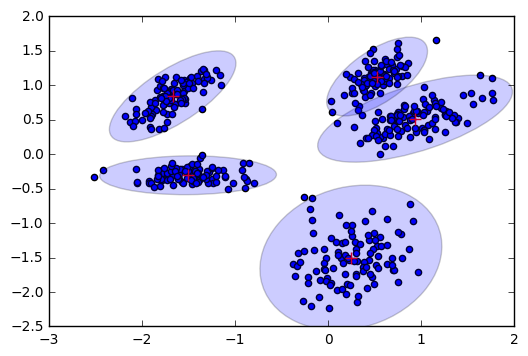

In [79]:
plot_gmm_solution(X, mu, sigma)

In [176]:
def test_em_gmm(X):
    worked1 = False
    worked2 = False
    for _ in range(10):
        mpi, mu, sigma, _ = em_gmm(X, k=3)

        # test one cluster center
        if (np.linalg.norm(mu[0] - [10.41666, 0.1666]) < 0.1 or
            np.linalg.norm(mu[1] - [10.41666, 0.1666]) < 0.1 or
            np.linalg.norm(mu[2] - [10.41666, 0.1666]) < 0.1):
            worked1 = True
        if ((np.abs(np.linalg.det(sigma[0]) - 0.03703) < 0.001 or
               np.abs(np.linalg.det(sigma[1]) - 0.03703) < 0.001 or
               np.abs(np.linalg.det(sigma[2]) - 0.03703) < 0.001) and
               (np.abs(np.linalg.det(sigma[0]) - 0.00925) < 0.001 or
               np.abs(np.linalg.det(sigma[1]) - 0.00925) < 0.0001 or
               np.abs(np.linalg.det(sigma[2]) - 0.00925) < 0.0001)):
            worked2 = True
        if worked1 and worked2:
            plot_gmm_solution(X, mu, sigma)
            break

    if not worked1:
        raise AssertionError('test_em_gmm did not find the correct cluster center.')
    if not worked2:
        raise AssertionError('test_em_gmm did not find the correct cluster center.')
    print("ok")

First choise of mu
[[ 10.   5.]
 [ 10.   0.]
 [  1.   1.]]
Number of iterations:  2
Log likelihood:  [[            -inf  -6.71637835e+02  -5.52413198e+02  -2.66693310e+02
   -2.14203961e+02  -2.51697224e+02  -4.96792718e-01  -4.96758977e-01
   -4.96882696e-01]
 [ -3.30471146e+02  -2.70475735e+02  -2.48731640e+02  -4.96792718e-01
   -4.96758977e-01  -4.96882696e-01  -2.21702983e+02  -2.74192264e+02
   -2.36699249e+02]
 [ -1.18997363e+00  -1.18992864e+00  -1.18997363e+00  -2.71169275e+02
   -2.70982425e+02  -3.31164731e+02  -1.96181199e+02  -2.07243674e+02
   -2.41178454e+02]]
loggamma:   [[         -inf -670.44790587 -551.22322444 -266.19651701 -213.70720236
  -251.2003412     0.            0.            0.        ]
 [-329.28117206 -269.28580653 -247.54166652    0.            0.            0.
  -221.20619003 -273.69550469 -236.20236585]
 [   0.            0.            0.         -270.67248267 -270.48566602
  -330.66784808 -195.68440644 -206.74691484 -240.68157167]]


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:31: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log


ok


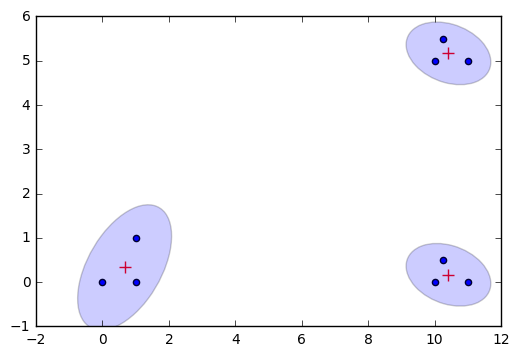

In [92]:
test_em_gmm(X)

In [199]:
for i in range(k):
    print(i)
    for j in range(n):
        print(norm_pdf(X[j], mu[i], C[i]))

0


TypeError: object of type 'numpy.float64' has no len()